## Simple  Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import time

In [2]:
df = pd.read_csv("02_area_price_000.csv")

In [3]:
df # Note that the price is in $000, i.e., a value of 350 means that the house price is $350,000

,area,price
0,1166,589.232
1,1589,771.387
2,602,357.510
3,982,455.796
4,1697,810.714
5,681,328.530
6,1299,567.522
7,1228,563.276
8,845,493.683
9,712,342.061


In [4]:
# Extract x (area) and y (price)
x = df["area"].values
y = df["price"].values

In [5]:
type(x[0]), type(y[0])

(numpy.int64, numpy.float64)

In [6]:
# Construct X matrix with a bias term (column of ones)
X = np.column_stack((np.ones(len(x)), x))
X

array([[1.000e+00, 1.166e+03],
       [1.000e+00, 1.589e+03],
       [1.000e+00, 6.020e+02],
       [1.000e+00, 9.820e+02],
       [1.000e+00, 1.697e+03],
       [1.000e+00, 6.810e+02],
       [1.000e+00, 1.299e+03],
       [1.000e+00, 1.228e+03],
       [1.000e+00, 8.450e+02],
       [1.000e+00, 7.120e+02],
       [1.000e+00, 1.446e+03],
       [1.000e+00, 1.567e+03],
       [1.000e+00, 9.920e+02]])

In [7]:
# Apply normal equation: β = (Xᵀ·X)⁻¹·Xᵀ·y
XT_X = X.T.dot(X)
XT_y = X.T.dot(y)
beta = np.linalg.inv(XT_X).dot(XT_y)

In [8]:
# Results
B0, B1 = beta
print(f"B0 (Intercept): {B0:.2f}")
print(f"B1 (Slope): {B1:.2f}")

B0 (Intercept): 77.07
B1 (Slope): 0.41


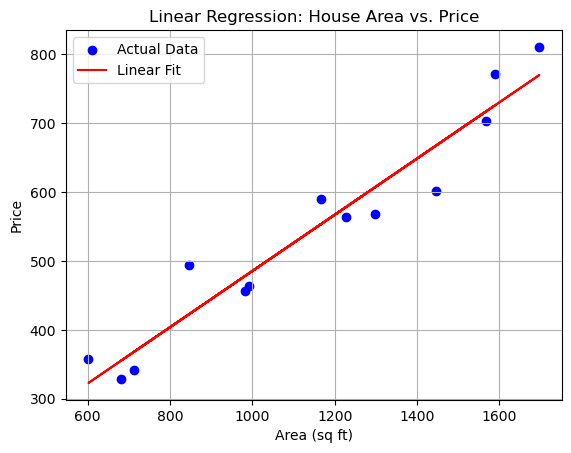

In [9]:
# Predict prices using the linear model
y_pred = B0 + B1 * x

# Plot actual vs. predicted
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Linear Fit')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Linear Regression: House Area vs. Price")
plt.legend()
plt.grid(True)
plt.show()

## Price is Right Game!

In [10]:
# Tracking data
areas = []
predicted_prices = []
guesses = []
errors = []
squared_errors = []

# Game duration
t_minutes = 3 # set minutes
duration = 60  * t_minutes
start_time = time.time()

# Valid exit phrases
stop_commands = ["exit", "stop", "quit", "^c"]

print(f"🎮 Price is Right Regression Challenge\nYou have {t_minutes} minutes to guess house prices based on area. Let's go!")

while time.time() - start_time < duration:
    # Generate house area in range [400, 2500]
    area = np.random.randint(400, 2500)
    predicted_price = B0 + B1 * area
    print(f"\n🏠 House Area: {area} sq ft")

    guess_input = input("💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit): ")

    if guess_input.lower() in stop_commands:
        print("🛑 Game stopped by user.")
        break

    try:
        guess = float(guess_input)
        error = guess - predicted_price
        se = error**2

        areas.append(area)
        predicted_prices.append(predicted_price)
        guesses.append(guess)
        errors.append(error)
        squared_errors.append(se)

        remaining_time = int(duration - (time.time() - start_time))
        print(f"📊 Predicted: ${1000*predicted_price:.2f} | Your Guess: ${1000*guess:.2f} | Error: ${1000*error:.2f} | ⏱️ Remaining Time: {remaining_time} seconds")

    except ValueError:
        print("❌ Invalid input. Please enter a number or a valid stop command.")

print("\n⏰ Time's up! Execute the Next Cells to Know your Score \n and See how you did:")


🎮 Price is Right Regression Challenge
You have 3 minutes to guess house prices based on area. Let's go!

🏠 House Area: 1378 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  600


📊 Predicted: $639669.71 | Your Guess: $600000.00 | Error: $-39669.71 | ⏱️ Remaining Time: 172 seconds

🏠 House Area: 1828 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  800


📊 Predicted: $823390.94 | Your Guess: $800000.00 | Error: $-23390.94 | ⏱️ Remaining Time: 161 seconds

🏠 House Area: 912 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  430


📊 Predicted: $449416.18 | Your Guess: $430000.00 | Error: $-19416.18 | ⏱️ Remaining Time: 150 seconds

🏠 House Area: 1331 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  600


📊 Predicted: $620481.05 | Your Guess: $600000.00 | Error: $-20481.05 | ⏱️ Remaining Time: 143 seconds

🏠 House Area: 1598 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  710


📊 Predicted: $729488.98 | Your Guess: $710000.00 | Error: $-19488.98 | ⏱️ Remaining Time: 130 seconds

🏠 House Area: 2322 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  1010


📊 Predicted: $1025076.02 | Your Guess: $1010000.00 | Error: $-15076.02 | ⏱️ Remaining Time: 101 seconds

🏠 House Area: 1105 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  515


📊 Predicted: $528212.17 | Your Guess: $515000.00 | Error: $-13212.17 | ⏱️ Remaining Time: 92 seconds

🏠 House Area: 1610 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  720


📊 Predicted: $734388.21 | Your Guess: $720000.00 | Error: $-14388.21 | ⏱️ Remaining Time: 73 seconds

🏠 House Area: 1284 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  560


📊 Predicted: $601292.39 | Your Guess: $560000.00 | Error: $-41292.39 | ⏱️ Remaining Time: 63 seconds

🏠 House Area: 2090 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  910


📊 Predicted: $930357.52 | Your Guess: $910000.00 | Error: $-20357.52 | ⏱️ Remaining Time: 49 seconds

🏠 House Area: 2030 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  890


📊 Predicted: $905861.36 | Your Guess: $890000.00 | Error: $-15861.36 | ⏱️ Remaining Time: 35 seconds

🏠 House Area: 1637 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  740


📊 Predicted: $745411.49 | Your Guess: $740000.00 | Error: $-5411.49 | ⏱️ Remaining Time: 20 seconds

🏠 House Area: 1262 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  570


📊 Predicted: $592310.46 | Your Guess: $570000.00 | Error: $-22310.46 | ⏱️ Remaining Time: 13 seconds

🏠 House Area: 1932 sq ft


💰 Your guess for the house price in $1000, i.e, if your guess $350,000 - you should enter 350 (or type 'stop' to quit):  880


📊 Predicted: $865850.96 | Your Guess: $880000.00 | Error: $14149.04 | ⏱️ Remaining Time: -1 seconds

⏰ Time's up! Execute the Next Cells to Know your Score 
 and See how you did:


In [11]:
# Summary table
results = pd.DataFrame({
    "Round": range(1, len(guesses) + 1),
    "Area (sq ft)": areas,
    "Your Guess ($)": guesses,
    "Model Prediction ($)": predicted_prices,
    "Error ($)": errors,
    "Squared Error": squared_errors
})

# Metrics
SSR = sum(squared_errors)
MSE = SSR / len(squared_errors) if squared_errors else 0
mean_prediction = np.mean(predicted_prices)
SST = sum((pred - mean_prediction)**2 for pred in predicted_prices)
R2 = 1 - SSR / SST if SST != 0 else 0

score = round(1000 * R2 * np.log1p(len(guesses)), 2)


# Summary row
summary = pd.DataFrame({
    "🧾 Summary of": [f"{len(areas)} rounds"],
    "Area (sq ft)": [f"Avg: {np.mean(areas):.2f}"],
    "Your Guess ($)": [f"Avg: {np.mean(guesses):.2f}"],
    "Model Prediction ($)": [f"Avg: {mean_prediction:.2f}"],
    "Error ($)": [f"Total SSR: {SSR:.2f}"],
    "Squared Error | Accuracy": [f"MSE: {MSE:.2f} | R²: {R2:.4f}"],
    "Score": [f"🏆 Score: {score}"]
})

display(results)
summary

,Round,Area (sq ft),Your Guess ($),Model Prediction ($),Error ($),Squared Error
0,1,1378,600.0,639.669713,-39.669713,1573.686159
1,2,1828,800.0,823.390940,-23.390940,547.136087
2,3,912,430.0,449.416176,-19.416176,376.987897
3,4,1331,600.0,620.481052,-20.481052,419.473487
4,5,1598,710.0,729.488980,-19.488980,379.820336
5,6,2322,1010.0,1025.076020,-15.076020,227.286394
6,7,1105,515.0,528.212169,-13.212169,174.561411
7,8,1610,720.0,734.388213,-14.388213,207.020661
8,9,1284,560.0,601.292390,-41.292390,1705.061506
9,10,2090,910.0,930.357521,-20.357521,414.428673


,🧾 Summary of,Area (sq ft),Your Guess ($),Model Prediction ($),Error ($),Squared Error | Accuracy,Score
0,14 rounds,Avg: 1594.21,Avg: 709.64,Avg: 727.94,Total SSR: 7004.28,MSE: 500.31 | R²: 0.9806,🏆 Score: 2655.45


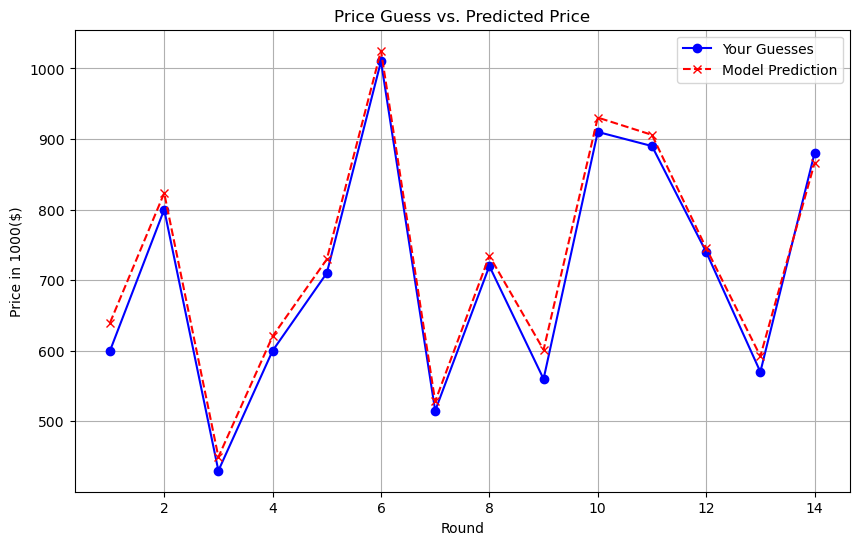

In [12]:
# Plot guesses vs. prediction
plt.figure(figsize=(10,6))
plt.plot(results["Round"], results["Your Guess ($)"], marker='o', label='Your Guesses', color='blue')
plt.plot(results["Round"], results["Model Prediction ($)"], marker='x', linestyle='--', label='Model Prediction', color='red')
plt.xlabel("Round")
plt.ylabel("Price in 1000($)")
plt.title("Price Guess vs. Predicted Price")
plt.legend()
plt.grid(True)
plt.show()